In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
wh_dataset = pd.read_csv("weight-height.xls")

In [3]:
wh_dataset.head

<bound method NDFrame.head of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]>

In [4]:
wh_dataset.loc[0]

Gender          Male
Height     73.847017
Weight    241.893563
Name: 0, dtype: object

Text(0.5, 1.0, 'Weight Distribution')

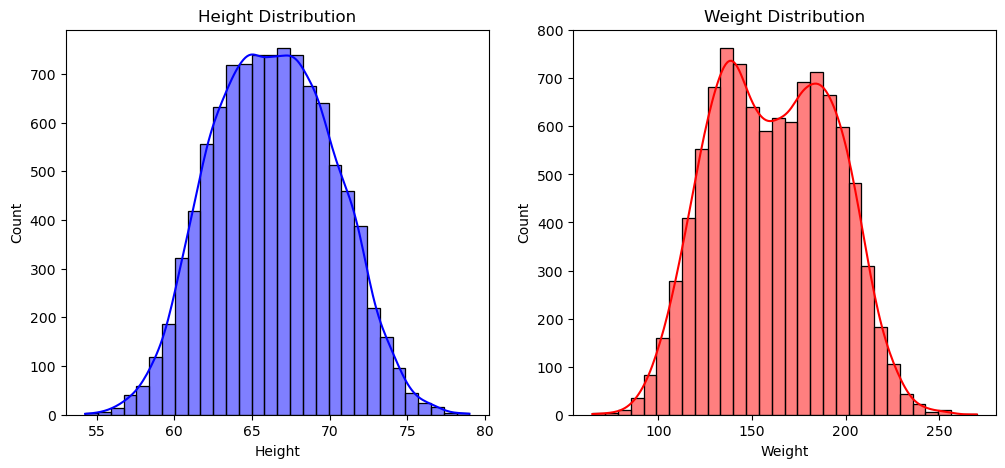

In [6]:
# Histogram for Height and Weight
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(wh_dataset["Height"], bins=30, kde=True, color='blue')
plt.title("Height Distribution")

plt.subplot(1, 2, 2)
sns.histplot(wh_dataset["Weight"], bins=30, kde=True, color='red')
plt.title("Weight Distribution")

In [7]:
wh_dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
H_Q1 = wh_dataset.Height.quantile(0.25)
H_Q3 = wh_dataset.Height.quantile(0.75)

In [9]:
H_Q1, H_Q3

(63.505620481218955, 69.1742617268347)

In [10]:
W_Q1 = wh_dataset.Weight.quantile(0.25)
W_Q3 = wh_dataset.Weight.quantile(0.75)

In [11]:
W_Q1, W_Q3

(135.8180513055015, 187.16952486868348)

In [12]:
H_IQR = H_Q3 - H_Q1
h_lower_limit = H_Q1 - 1.5 * H_IQR
h_higher_limit = H_Q3 + 1.5 * H_IQR

In [13]:
W_IQR = W_Q3 - W_Q1
w_lower_limit = W_Q1 - 1.5 * W_IQR
w_higher_limit = W_Q3 + 1.5 * W_IQR

In [14]:
outlier_x = wh_dataset[(wh_dataset.Height < h_lower_limit) | (wh_dataset.Height > h_higher_limit)]
outlier_y = wh_dataset[(wh_dataset.Weight < w_lower_limit) | (wh_dataset.Weight > w_higher_limit)]

In [15]:
outlier_x, outlier_y

(      Gender     Height      Weight
 994     Male  78.095867  255.690835
 1317    Male  78.462053  227.342565
 2014    Male  78.998742  269.989699
 3285    Male  78.528210  253.889004
 3757    Male  78.621374  245.733783
 6624  Female  54.616858   71.393749
 7294  Female  54.873728   78.606670
 9285  Female  54.263133   64.700127,
      Gender     Height      Weight
 2014   Male  78.998742  269.989699)

In [16]:
no_outlier_x = wh_dataset[(wh_dataset.Height > h_lower_limit) & (wh_dataset.Height < h_higher_limit)]
no_outlier_y = wh_dataset[(wh_dataset.Weight > w_lower_limit) & (wh_dataset.Weight < w_higher_limit)]

In [17]:
no_outlier_x

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
